# Essential Pandas for Machine Learning

This tutorial is an adjustment of 
https://www.kaggle.com/krantiveer/topic-1-exploratory-data-analysis-with-pandas/

<img src="images/pandas.jpg"  width=50% />

1. Introduction to Pandas

    - High Performance, Easy-to-use open source library for Data Analysis
    - Creates tabular format of data from different sources like csv, json, database.
    - Have utilities for descriptive statistics, aggregation, handling missing data
    - Database utilities like merge, join are available
    - Fast, Programmable & Easy alternative to spreadsheets

Task: Please import the Pandas und Numpy Libraries!

We’ll demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. 

Before we start, let’s briefly recap what churn actually is: Churn quantifies the number of customers who have unsubscribed or canceled their service contract. Customers turning their back to your service or product are no fun for any business. It is very expensive to win them back once lost, not even thinking that they will not do the best word to mouth marketing if unsatisfied. 

Task: Let’s read the data (using the read_csv method), and take a look at the first 5 lines using the head method:

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Task: Let’s have a look at data dimensionality, feature names, and feature types using `shape`:

From the output, we can see that the table contains 3333 rows and 20 columns.

Now let’s try printing out column names using `columns`:

We can use the `info()` method to output some general information about the dataframe: 

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

Task: We can **change the column type** with the `astype` method. Let’s apply this method to the `Churn` feature to convert it into `int64`:

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's take a look at the distribution of `Churn`:

2850 users out of 3333 are *loyal*; their `Churn` value is 0. To calculate fractions, pass `normalize=True` to the `value_counts` function.

### Sorting

A `DataFrame` can be sorted by the value of one of the variables (i.e columns). For example, we can sort by 
*Total day charge* (use `ascending=False` to sort in descending order):

We can also sort by multiple columns:

A `DataFrame` can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Lets use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**

14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the `DataFrame` consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**What are average values of numerical features for churned users?**

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construction:

### Summary tables

Suppose we want to see how the observations in our dataset are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:

We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

## 2. First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We’ll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn` (however, visual analysis will be covered more thoroughly in the next article).


In [29]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# !pip install seaborn 
import seaborn as sns
# import some nice vis settings 
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

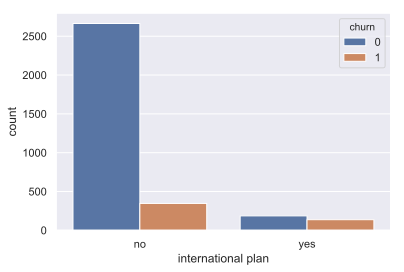

In [30]:
sns.countplot(x='international plan', hue='churn', data=df);

We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let’s look at another important feature – *Customer service calls*. Let’s also make a summary table and a picture.

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.